<a href="https://colab.research.google.com/github/syeda-rosa10/Medicine-Review/blob/master/medicine_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import logging
from numpy import random

import nltk
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,Id,drugName,condition,review,rating,date,usefulCount,output
0,0,Escitalopram,Premenstrual Dysphoric Disorde,"""This drug has changed my life. I take 5mg onl...",10,2016-01-30,23,No
1,1,Yaz,Birth Control,"""I&#039;ve been experimenting with different b...",10,2013-02-01,55,No
2,2,Tramadol,Pain,"""I broke my nose and was prescribed tramadol b...",10,2016-11-04,26,No
3,3,Ethinyl estradiol / norgestimate,Birth Control,"""I&rsquo;ve only gone through a pack and a hal...",10,2017-11-02,0,No
4,4,Actiq,Breakthrough Pain,"""When on this medication,along with a long-act...",10,2009-08-21,38,No


In [ ]:
df.shape

(40324, 8)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['review'] = df['review'].apply(clean_text)

In [ ]:
df.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,0,Escitalopram,Premenstrual Dysphoric Disorde,drug changed life take 5mg luteal phase comple...,10,30-01-2016,23
1,1,Yaz,Birth Control,ive experimenting different brands birth contr...,10,01-02-2013,55
2,2,Tramadol,Pain,broke nose prescribed tramadol dr whatever sho...,10,04-11-2016,26
3,3,Ethinyl estradiol / norgestimate,Birth Control,ive gone pack half much better generess fe yea...,10,02-11-2017,0
4,4,Actiq,Breakthrough Pain,medication along longactingpain medication fee...,10,21-08-2009,38


In [ ]:
nbs=TfidfVectorizer( max_features=22627)
X = nbs.fit_transform(df.review)
y=df.rating

In [ ]:
X.shape

(40324, 22627)

In [ ]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

In [ ]:
# instantiate second RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix # import metrics
from sklearn.model_selection import KFold, cross_val_score # import evaluation tools
from sklearn.metrics import classification_report

forest_4 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10000, min_samples_split = 0.001)

# train
forest_4.fit(X_train, y_train)

# predict
y_test_preds = forest_4.predict(X_test)

In [ ]:
print('accuracy on train set %s' % accuracy_score(y_train, forest_4.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(y_test_preds, y_test))

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest: \n', report)

print(confusion_matrix(y_test_preds,y_test))

accuracy on train set 0.9546444021933813
accuracy on test set 0.44780560376890655
Classification Report Random Forest: 
               precision    recall  f1-score   support

           1       0.57      0.50      0.53       546
           2       1.00      0.12      0.22       177
           3       1.00      0.10      0.18       165
           4       1.00      0.06      0.12       125
           5       1.00      0.08      0.16       202
           6       1.00      0.12      0.21       158
           7       1.00      0.10      0.19       230
           8       0.97      0.13      0.23       462
           9       0.66      0.16      0.26       692
          10       0.39      0.98      0.56      1276

    accuracy                           0.45      4033
   macro avg       0.86      0.24      0.27      4033
weighted avg       0.69      0.45      0.37      4033

[[ 271   44   39   23   28   16    8   17   13   15]
 [   0   22    0    0    0    0    0    0    0    0]
 [   0    0   

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse2=np.sqrt(mean_squared_error(y_test,y_test_preds))
rmse2

3.5852412571964383

In [ ]:
dt=pd.read_csv("test.csv")

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
dt['review'] = dt['review'].apply(clean_text)

In [ ]:
dt.shape

(13442, 6)

In [ ]:
dt.head()

,Id,drugName,condition,review,date,usefulCount
0,0,Drospirenone / ethinyl estradiol,Birth Control,side effects nausea headaches etc regulated pe...,2015-05-05,3
1,1,Lithium,Bipolar Disorde,originally got sick insomnia mania prescribed ...,2014-07-07,33
2,2,Concerta,ADHD,adult adhd concerta way go focused able comple...,2009-08-09,40
3,3,Orthovisc,Osteoarthritis,waste money paid copay 400 3 injections left r...,2015-06-20,21
4,4,Lorcaserin,Weight Loss,took first pill yesterday noticed almost immed...,2016-06-22,19


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
nbs = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer())])

Xt = nbs.fit_transform(dt.review)

In [ ]:
nbs=TfidfVectorizer()
Xt = nbs.fit_transform(dt.review)

In [ ]:
Xt

<13442x22627 sparse matrix of type '<class 'numpy.float64'>'
	with 503397 stored elements in Compressed Sparse Row format>

In [ ]:
X_train

<36291x22627 sparse matrix of type '<class 'numpy.float64'>'
	with 1342632 stored elements in Compressed Sparse Row format>

In [ ]:
type(Xt)

scipy.sparse.csr.csr_matrix

In [ ]:
y_test_preds = forest_4.predict(Xt)

In [ ]:
y_test_preds

array([10, 10, 10, ..., 10, 10,  1], dtype=int64)

In [ ]:
#---------------------------------------------------------------------------------#

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

nbs = LinearSVC()
nbs.fit(X_train, y_train)


y_pred = nbs.predict(X_test)

print('accuracy on train set %s' % accuracy_score(y_train, nbs.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(y_pred, y_test))

accuracy on train set 0.7943016174809181
accuracy on test set 0.43069675179766925


In [ ]:
# evaluate
report = classification_report(y_test, y_pred)
print('Classification Report Linear SVC: \n', report)

Classification Report Linear SVC: 
               precision    recall  f1-score   support

           1       0.48      0.63      0.54       546
           2       0.31      0.16      0.21       177
           3       0.28      0.15      0.19       165
           4       0.24      0.09      0.13       125
           5       0.28      0.16      0.20       202
           6       0.30      0.14      0.19       158
           7       0.30      0.15      0.20       230
           8       0.29      0.21      0.25       462
           9       0.31      0.28      0.30       692
          10       0.52      0.74      0.61      1276

    accuracy                           0.43      4033
   macro avg       0.33      0.27      0.28      4033
weighted avg       0.39      0.43      0.40      4033



In [ ]:
print(confusion_matrix(y_pred,y_test))

[[344  75  60  32  42  29  20  33  28  54]
 [ 22  29   7   5  10   2   5   5   2   8]
 [  9   6  24  10   5   4   6   7   7   8]
 [  6   1   4  11   6   3   3   4   5   3]
 [  9   8  10   5  32   6   7  18  11   9]
 [  6   6   2   3   4  22   9   7   6   8]
 [  5   5   8   3   7   9  35  15  20  10]
 [ 14   6  10   9  21  20  33  99  64  66]
 [ 39  18  15   9  25  23  41  88 193 162]
 [ 92  23  25  38  50  40  71 186 356 948]]


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)
pred_y = clf.predict(X_test)

print('accuracy on train set %s' % accuracy_score(y_train, clf.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(pred_y, y_test))

report = classification_report(y_test, pred_y)
print('Classification Report Logistic regression: \n', report)

print(confusion_matrix(pred_y,y_test))

accuracy on train set 0.5525336860378606
accuracy on test set 0.42201834862385323
Classification Report Logistic regression: 
               precision    recall  f1-score   support

           1       0.46      0.68      0.55       546
           2       0.33      0.05      0.08       177
           3       0.13      0.02      0.04       165
           4       0.14      0.01      0.02       125
           5       0.30      0.09      0.14       202
           6       0.08      0.01      0.01       158
           7       0.17      0.04      0.06       230
           8       0.26      0.17      0.20       462
           9       0.29      0.23      0.26       692
          10       0.48      0.82      0.61      1276

    accuracy                           0.42      4033
   macro avg       0.26      0.21      0.20      4033
weighted avg       0.35      0.42      0.35      4033

[[ 372   91   76   37   54   34   25   32   35   45]
 [   4    8    2    2    4    1    0    0    1    2]
 [   4  

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(df['rating'].value_counts())

# resample data ONLY using training data
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_train).value_counts())

Before Upsampling with SMOTE:
10    12756
9      6916
1      5459
8      4625
7      2298
5      2020
2      1770
3      1652
6      1580
4      1248
Name: rating, dtype: int64

After Upsampling with SMOTE:
10    11480
9     11480
8     11480
7     11480
6     11480
5     11480
4     11480
3     11480
2     11480
1     11480
Name: rating, dtype: int64


(None, None)

In [ ]:
# instantiate second RandomForestClassifier with entropy and SMOTE
forest_3 = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# train
forest_3.fit(X_train, y_train)

# predict
y_test_preds = forest_3.predict(X_test)

print('accuracy on train set %s' % accuracy_score(y_train, forest_3.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(y_test_preds, y_test))


# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and SMOTE Upsampling: \n', report)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

nbs2 = LinearSVC()
nbs2.fit(X_train, y_train)


y_pred = nbs2.predict(X_test)

print('accuracy on train set %s' % accuracy_score(y_train, nbs2.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(y_pred, y_test))

accuracy on train set 0.9329094076655052
accuracy on test set 0.3617654351599306


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)
pred_y = clf.predict(X_test)

print('accuracy on train set %s' % accuracy_score(y_train, clf.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(pred_y, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy on train set 0.7623954703832753
accuracy on test set 0.3399454500371932


In [ ]:
#------------------------------------------------------#

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Get review text
reviews = np.vstack((train.review.values.reshape(-1, 1), 
                     test.review.values.reshape(-1, 1)))

# Set up function to re-vectorize reviews. This time binary is set to false, we only have 500 max features and min and max_df arguments have been set.
vectorizer = CountVectorizer(binary=False, stop_words=stopwords.words('english'),
                             lowercase=True, min_df=3, max_df=0.9, max_features=500)

# Vectorize reviews
X = vectorizer.fit_transform(reviews.ravel()).toarray()

# Get ratings

y = train.rating.values.reshape(-1, 1)

X_train, X_test = X[:train.values.shape[0], :], X[train.values.shape[0]:, :] 
y_train, y_test = y[:train.values.shape[0]], y[train.values.shape[0]:]

In [ ]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53766, 500), (40324, 1), (40324, 500), (40324, 1), (13442, 500), (0, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[:5000], y_train[:5000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = lin_reg.predict(X_train[5000:])

In [ ]:
np.sum(np.abs(y_train[5000:] - pred[:])) / (40324 - 5000)

2.330230047590338

In [ ]:
pred = lin_reg.predict(X_test)

In [ ]:
print('accuracy on test set %s' % accuracy_score(pred, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [13442, 0]

In [ ]:
#--------------------------------------------#

In [ ]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv("test.csv")

In [ ]:
train.shape,test.shape

((40324, 7), (13442, 6))

In [ ]:
b = "'@#$%^()&*;!.-"
X_train = np.array(train['review'])
X_test = np.array(test['review'])

def clean(X):
    for index, review in enumerate(X):
        for char in b:
            X[index] = X[index].replace(char, "")
    return(X)

X_train = clean(X_train)
X_test = clean(X_test)
print(X_train[:2])

['"This drug has changed my life I take 5mg only in the luteal phase and it has completely cured my severe PMT symptoms, I was anxious, paranoid, angry and tearful I was pushing my family and husband away and falling out with friends At the point of suicidal thought I couldn039t take it anymore and contacted my GP My only regret is not doing it earlier I began on 10 mg but it was too strong for me, I was dizzy and hyper After halving the dose it was like a magic switch being turned on and I immediately felt like my own self I have no side effects coming off the drug at the end of my two weeks and just a headache for an hour when I restart them No weight gain either, I039ve actually lost 10lb cos I039m energetic enough for the gym"'
 '"I039ve been experimenting with different brands of birth control for 15 years I took every pill under the sun, including the shot but always suffered terrible side effects from nausea and vomiting, to crazy mood swings, depression, anxiety and weight gain

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from keras.utils import to_categorical
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk

vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'),lowercase=True, max_features=5000)
#vectorizer = TfidfVectorizer(binary=True, stop_words=stopwords.words('english'), lowercase=True, max_features=5000)
test_train = np.concatenate([X_train, X_test])
print(test_train.shape)
X_onehot = vectorizer.fit_transform(test_train)
stop_words = vectorizer.get_stop_words()
print(type(X_onehot))

Using TensorFlow backend.


(53766,)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
print(X_onehot.shape)
print(X_onehot.toarray())

(53766, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
names_list = vectorizer.get_feature_names()
names = [[i] for i in names_list]
names = Word2Vec(names, min_count=1)
print(len(list(names.wv.vocab)))
print(list(names.wv.vocab)[:5])

5000
['00', '000', '005', '00am', '00pm']


In [ ]:
##### def score_transform(X):
    y_reshaped = np.reshape(X['rating'].values, (-1, 1))
    for index, val in enumerate(y_reshaped):
        if val >= 8:
            y_reshaped[index] = 1
        elif val >= 5:
            y_reshaped[index] = 2
        else:
            y_reshaped[index] = 0
    y_result = to_categorical(y_reshaped)
    return y_result
    
    print(X_onehot)

In [ ]:
def score_transform(X):
    y_reshaped = np.reshape(X['rating'].values, (-1, 1))
    for index, val in enumerate(y_reshaped):
        if val == 1:
            y_reshaped[index] = 1
        elif val == 9:
            y_reshaped[index] = 9
        elif val == 8:
            y_reshaped[index] = 8
        elif val == 7:
            y_reshaped[index] = 7
        elif val == 6:
            y_reshaped[index] = 6
        elif val == 5:
            y_reshaped[index] = 5
        elif val == 4:
            y_reshaped[index] = 4
        elif val == 3:
            y_reshaped[index] = 3
        elif val == 2:
            y_reshaped[index] = 2
        
        else:
            y_reshaped[index] = 10
    y_result = to_categorical(y_reshaped)
    return y_result
    
    print(X_onehot)

In [ ]:
y_train_test = pd.concat([train, test], ignore_index=True)
y_train = score_transform(y_train_test)
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(53766, 11)


In [ ]:
from numpy.random import seed

np.random.seed(1)
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000028562ACD888>>

In [ ]:
X_onehot.shape

(53766, 5000)

In [ ]:
history = model.fit(X_onehot[:-13542], y_train[:-13542], epochs=6, batch_size=128, verbose=1, validation_data=(X_onehot[37382:37482], y_train[37382:37482]))

Train on 40224 samples, validate on 100 samples
Epoch 1/6
40224/40224 [==============================] - 13s 316us/step - loss: 1.7549 - accuracy: 0.3989 - val_loss: 1.3075 - val_accuracy: 0.5900
Epoch 2/6
40224/40224 [==============================] - 13s 311us/step - loss: 1.4162 - accuracy: 0.5112 - val_loss: 1.0066 - val_accuracy: 0.7400
Epoch 3/6
40224/40224 [==============================] - 13s 314us/step - loss: 1.1163 - accuracy: 0.6339 - val_loss: 0.7045 - val_accuracy: 0.8400
Epoch 4/6
40224/40224 [==============================] - 13s 314us/step - loss: 0.7680 - accuracy: 0.7731 - val_loss: 0.4294 - val_accuracy: 0.9400
Epoch 5/6
40224/40224 [==============================] - 13s 313us/step - loss: 0.4769 - accuracy: 0.8829 - val_loss: 0.2349 - val_accuracy: 0.9600
Epoch 6/6
40224/40224 [==============================] - 12s 303us/step - loss: 0.2891 - accuracy: 0.9432 - val_loss: 0.1493 - val_accuracy: 0.9800


In [ ]:
scores = model.evaluate(X_onehot[37482:], y_train[37482:], verbose=1)

16284/16284 [==============================] - 3s 164us/step


In [ ]:
scores[1]

0.2942765951156616

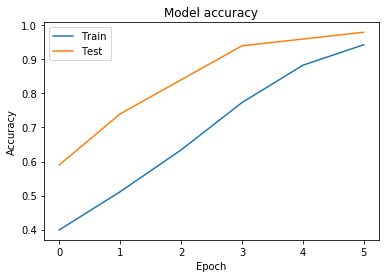

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()